In [1]:
#Import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [26]:
#Import files =9 seperate datasets
data_2015=pd.read_csv('/Users/alanoudalturki/Desktop/HAP725CaseStudy/ReadmissionRate/2015.csv', encoding = 'unicode_escape',low_memory=False)
data_2016=pd.read_csv('/Users/alanoudalturki/Desktop/HAP725CaseStudy/ReadmissionRate/2016.csv', encoding = 'unicode_escape',low_memory=False)
data_2017=pd.read_csv('/Users/alanoudalturki/Desktop/HAP725CaseStudy/ReadmissionRate/2017.csv', encoding = 'unicode_escape',low_memory=False)
data_2018=pd.read_csv('/Users/alanoudalturki/Desktop/HAP725CaseStudy/ReadmissionRate/2018.csv', encoding = 'unicode_escape',low_memory=False)
data_2019=pd.read_csv('/Users/alanoudalturki/Desktop/HAP725CaseStudy/ReadmissionRate/2019.csv', encoding = 'unicode_escape',low_memory=False)
data_2021=pd.read_csv('/Users/alanoudalturki/Desktop/HAP725CaseStudy/ReadmissionRate/2021.csv', encoding = 'unicode_escape',low_memory=False)
data_2022=pd.read_csv('/Users/alanoudalturki/Desktop/HAP725CaseStudy/ReadmissionRate/2022.csv', encoding = 'unicode_escape',low_memory=False)
data_2023=pd.read_csv('/Users/alanoudalturki/Desktop/HAP725CaseStudy/ReadmissionRate/2023.csv', encoding = 'unicode_escape',low_memory=False)

In [17]:
data_2015

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT_30_AMI,No different than the National Rate,699,12.2,10.2,14.7,NaN,07/01/2011,06/30/2014
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG,MORT_30_CABG,No different than the National Rate,269,3.7,2.2,6.3,NaN,07/01/2011,06/30/2014
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for chronic obstructive pulmonary d...,MORT_30_COPD,No different than the National Rate,566,8.8,6.9,11.4,NaN,07/01/2011,06/30/2014
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart failure (HF) 30-Day Mortality Rate,MORT_30_HF,No different than the National Rate,776,12.6,10.7,15.1,NaN,07/01/2011,06/30/2014
4,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Pneumonia (PN) 30-Day Mortality Rate,MORT_30_PN,No different than the National Rate,374,11.6,9.1,15.0,NaN,07/01/2011,06/30/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66733,670106,PEARLAND MEDICAL CENTER,11100 SHADOW CREEK PARKWAY,PEARLAND,TX,77584,BRAZORIA,7137707000,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,Not Available,Not Available,Not Available,Not Available,Not Available,5 - Results are not available for this reporti...,07/01/2011,06/30/2014
66734,670106,PEARLAND MEDICAL CENTER,11100 SHADOW CREEK PARKWAY,PEARLAND,TX,77584,BRAZORIA,7137707000,Rate of readmission after hip/knee surgery,READM_30_HIP_KNEE,Not Available,Not Available,Not Available,Not Available,Not Available,5 - Results are not available for this reporti...,07/01/2011,06/30/2014
66735,670106,PEARLAND MEDICAL CENTER,11100 SHADOW CREEK PARKWAY,PEARLAND,TX,77584,BRAZORIA,7137707000,Rate of readmission after discharge from hospi...,READM_30_HOSP_WIDE,Not Available,Not Available,Not Available,Not Available,Not Available,5 - Results are not available for this reporti...,07/01/2013,06/30/2014
66736,670106,PEARLAND MEDICAL CENTER,11100 SHADOW CREEK PARKWAY,PEARLAND,TX,77584,BRAZORIA,7137707000,Pneumonia (PN) 30-Day Readmission Rate,READM_30_PN,Not Available,Not Available,Not Available,Not Available,Not Available,5 - Results are not available for this reporti...,07/01/2011,06/30/2014


In [27]:
#filter
data_2015 = data_2015 [(data_2015['Measure ID'].str.contains('READM_30_HF'))]
data_2016 = data_2016 [(data_2016['Measure ID'].str.contains('READM_30_HF'))]
data_2017 = data_2017 [(data_2017['Measure ID'].str.contains('READM_30_HF'))]
data_2018 = data_2018 [(data_2018['Measure ID'].str.contains('READM_30_HF'))]
data_2019 = data_2019 [(data_2019['Measure ID'].str.contains('READM_30_HF'))]
data_2021 = data_2021 [(data_2021['Measure ID'].str.contains('READM_30_HF'))]
data_2022 = data_2022 [(data_2022['Measure ID'].str.contains('READM_30_HF'))]
data_2023 = data_2023 [(data_2023['Measure ID'].str.contains('READM_30_HF'))]

In [28]:
data_2022

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Number of Patients,Number of Patients Returned,Footnote,Start Date,End Date
10,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,READM_30_HF,Heart failure (HF) 30-Day Readmission Rate,No Different Than the National Rate,755,22.4,20.1,25.0,Not Applicable,Not Applicable,NaN,07/01/2018,06/30/2021
24,010005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,READM_30_HF,Heart failure (HF) 30-Day Readmission Rate,No Different Than the National Rate,157,21.4,17.8,25.4,Not Applicable,Not Applicable,NaN,07/01/2018,06/30/2021
38,010006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 768-8400,READM_30_HF,Heart failure (HF) 30-Day Readmission Rate,No Different Than the National Rate,550,20,17.5,22.7,Not Applicable,Not Applicable,NaN,07/01/2018,06/30/2021
52,010007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,(334) 493-3541,READM_30_HF,Heart failure (HF) 30-Day Readmission Rate,No Different Than the National Rate,51,23.7,19.1,28.3,Not Applicable,Not Applicable,NaN,07/01/2018,06/30/2021
66,010008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,(334) 335-3374,READM_30_HF,Heart failure (HF) 30-Day Readmission Rate,Number of Cases Too Small,Not Available,Not Available,Not Available,Not Available,Not Applicable,Not Applicable,1,07/01/2018,06/30/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67770,670285,KINGWOOD EMERGENCY HOSPITAL,23330 HIGHWAY 59 N,KINGWOOD,TX,77339,HARRIS,(832) 777-6165,READM_30_HF,Heart failure (HF) 30-Day Readmission Rate,Not Available,Not Available,Not Available,Not Available,Not Available,Not Applicable,Not Applicable,5,07/01/2018,06/30/2021
67784,670300,METHODIST MIDLOTHIAN MEDICAL CENTER,1201 E HIGHWAY 287,MIDLOTHIAN,TX,76065,ELLIS,(469) 846-2000,READM_30_HF,Heart failure (HF) 30-Day Readmission Rate,Number of Cases Too Small,Not Available,Not Available,Not Available,Not Available,Not Applicable,Not Applicable,1,07/01/2018,06/30/2021
67798,670309,TEXAS HEALTH HOSPITAL MANSFIELD,2300 LONE STAR ROAD,MANSFIELD,TX,76063,TARRANT,(682) 341-5000,READM_30_HF,Heart failure (HF) 30-Day Readmission Rate,Number of Cases Too Small,Not Available,Not Available,Not Available,Not Available,Not Applicable,Not Applicable,1,07/01/2018,06/30/2021
67812,670310,SE TEXAS ER & HOSPITAL,19211 MCKAY BLVD,HUMBLE,TX,77338,HARRIS,(704) 887-7283,READM_30_HF,Heart failure (HF) 30-Day Readmission Rate,Not Available,Not Available,Not Available,Not Available,Not Available,Not Applicable,Not Applicable,5,07/01/2018,06/30/2021


In [29]:
#step 3 select spesific columns

#2015
Data2015_filtered=pd.DataFrame(data_2015, columns =['Provider ID','Hospital Name','Measure Name',
                                                    'Measure ID', 'Denominator', 'Score','Measure Start Date',
                                                    'Measure End Date'])

#2016
Data2016_filtered=pd.DataFrame(data_2016, columns =['Provider ID','Hospital Name','Measure Name','Measure ID',
                                                     'Denominator', 'Score','Measure Start Date','Measure End Date'])

#2017
Data2017_filtered=pd.DataFrame(data_2017, columns =['Provider ID','Hospital Name','Measure Name',
                                                    'Measure ID', 'Denominator', 'Score','Measure Start Date',
                                                    'Measure End Date'])

#2018
Data2018_filtered=pd.DataFrame(data_2018, columns =['Provider ID','Hospital Name','Measure Name',
                                                    'Measure ID', 'Denominator', 'Score','Measure Start Date',
                                                    'Measure End Date'])

#2019
Data2019_filtered=pd.DataFrame(data_2019, columns =['Facility ID','Facility Name','Measure Name',
                                                    'Measure ID','Denominator', 'Score','Measure Start Date',
                                                    'Measure End Date'])


#2021
Data2021_filtered=pd.DataFrame(data_2021, columns =['Facility ID','Facility Name','Measure Name',
                                                    'Measure ID','Denominator', 'Score','Measure Start Date',
                                                    'Measure End Date'])

#2022
Data2022_filtered=pd.DataFrame(data_2022, columns =['Facility ID','Facility Name','Measure Name',
                                                    'Measure ID','Denominator', 'Score','Measure Start Date',
                                                    'Measure End Date'])

#2023
Data2023_filtered=pd.DataFrame(data_2023, columns =['Facility ID','Facility Name','Measure Name',
                                                    'Measure ID','Denominator', 'Score','Measure Start Date',
                                                    'Measure End Date'])

In [30]:
Data2023_filtered

,Facility ID,Facility Name,Measure Name,Measure ID,Denominator,Score,Measure Start Date,Measure End Date
10,010001,SOUTHEAST HEALTH MEDICAL CENTER,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,755,22.4,NaN,NaN
24,010005,MARSHALL MEDICAL CENTERS,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,157,21.4,NaN,NaN
38,010006,NORTH ALABAMA MEDICAL CENTER,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,550,20,NaN,NaN
52,010007,MIZELL MEMORIAL HOSPITAL,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,51,23.7,NaN,NaN
66,010008,CRENSHAW COMMUNITY HOSPITAL,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,Not Available,Not Available,NaN,NaN
...,...,...,...,...,...,...,...,...
67812,670285,KINGWOOD EMERGENCY HOSPITAL,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,Not Available,Not Available,NaN,NaN
67826,670300,METHODIST MIDLOTHIAN MEDICAL CENTER,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,Not Available,Not Available,NaN,NaN
67840,670309,TEXAS HEALTH HOSPITAL MANSFIELD,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,Not Available,Not Available,NaN,NaN
67854,670310,SE TEXAS ER & HOSPITAL,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,Not Available,Not Available,NaN,NaN


In [31]:
#Step 6: Replacing ‘Not Available’ entry
# Replace "Not Available"


Data2015_filtered ['Score']=pd.to_numeric(Data2015_filtered['Score'],errors= 'coerce')
Data2015_filtered = Data2015_filtered.replace(np.nan,0, regex =True )


Data2016_filtered ['Score']=pd.to_numeric(Data2016_filtered['Score'],errors= 'coerce')
Data2016_filtered = Data2016_filtered.replace(np.nan,0, regex =True )


Data2017_filtered ['Score']=pd.to_numeric(Data2017_filtered['Score'],errors= 'coerce')
Data2017_filtered = Data2017_filtered.replace(np.nan,0, regex =True )


Data2018_filtered ['Score']=pd.to_numeric(Data2018_filtered['Score'],errors= 'coerce')
Data2018_filtered = Data2018_filtered.replace(np.nan,0, regex =True )


Data2019_filtered ['Score']=pd.to_numeric(Data2019_filtered['Score'],errors= 'coerce')
Data2019_filtered = Data2019_filtered.replace(np.nan,0, regex =True )


Data2021_filtered ['Score']=pd.to_numeric(Data2021_filtered['Score'],errors= 'coerce')
Data2021_filtered = Data2021_filtered.replace(np.nan,0, regex =True )


Data2022_filtered ['Score']=pd.to_numeric(Data2022_filtered['Score'],errors= 'coerce')
Data2022_filtered = Data2022_filtered.replace(np.nan,0, regex =True )


Data2023_filtered ['Score']=pd.to_numeric(Data2023_filtered['Score'],errors= 'coerce')
Data2023_filtered = Data2023_filtered.replace(np.nan,0, regex =True )

In [32]:
#Step 6: Replacing ‘Not Available’ entry
# Replace "Not Available"


Data2015_filtered ['Denominator']=pd.to_numeric(Data2015_filtered['Denominator'],errors= 'coerce')
Data2015_filtered = Data2015_filtered.replace(np.nan,0, regex =True )


Data2016_filtered ['Denominator']=pd.to_numeric(Data2016_filtered['Denominator'],errors= 'coerce')
Data2016_filtered = Data2016_filtered.replace(np.nan,0, regex =True )


Data2017_filtered ['Denominator']=pd.to_numeric(Data2017_filtered['Denominator'],errors= 'coerce')
Data2017_filtered = Data2017_filtered.replace(np.nan,0, regex =True )


Data2018_filtered ['Denominator']=pd.to_numeric(Data2018_filtered['Denominator'],errors= 'coerce')
Data2018_filtered = Data2018_filtered.replace(np.nan,0, regex =True )


Data2019_filtered ['Denominator']=pd.to_numeric(Data2019_filtered['Denominator'],errors= 'coerce')
Data2019_filtered = Data2019_filtered.replace(np.nan,0, regex =True )


Data2021_filtered ['Denominator']=pd.to_numeric(Data2021_filtered['Denominator'],errors= 'coerce')
Data2021_filtered = Data2021_filtered.replace(np.nan,0, regex =True )


Data2022_filtered ['Denominator']=pd.to_numeric(Data2022_filtered['Denominator'],errors= 'coerce')
Data2022_filtered = Data2022_filtered.replace(np.nan,0, regex =True )


Data2023_filtered ['Denominator']=pd.to_numeric(Data2023_filtered['Denominator'],errors= 'coerce')
Data2023_filtered = Data2023_filtered.replace(np.nan,0, regex =True )

In [33]:
##Step 6a: View updated column


print ("/033[1m"+ '2015 Score Value float Types' +"/033[0m" )
print (Data2015_filtered['Score'].head(10))

print ("/033[1m"+ '2016 Score  Value float Types' +"/033[0m" )
print (Data2016_filtered['Score'].head(10))

print ("/033[1m"+ '2017 Score Value float Types' +"/033[0m" )
print (Data2017_filtered['Score'].head(10))

print ("/033[1m"+ '2018 Score Value float Types'+"/033[0m" )
print (Data2018_filtered['Score'].head(10))

print ("/033[1m"+ '2019 Score Value float Types' +"/033[0m" )
print (Data2019_filtered['Score'].head(10))

print ("/033[1m"+ '2021 Score Value float Types' +"/033[0m" )
print (Data2021_filtered['Score'].head(10))

print ("/033[1m"+ '2022 Score Value float Types' +"/033[0m" )
print (Data2022_filtered['Score'].head(10))

print ("/033[1m"+ '2023 Score Value float Types' +"/033[0m" )
print (Data2023_filtered['Score'].head(10))

/0332015 Score Value float Types/033
9      21.0
23     21.5
37     20.8
51     21.3
65     22.0
79     20.3
93     22.9
107    21.4
121     0.0
135    22.3
Name: Score, dtype: float64
/0332016 Score  Value float Types/033
9      21.4
23     21.9
37     20.6
51     21.1
65     23.1
79     19.8
93     23.4
107    21.5
121     0.0
135    22.4
Name: Score, dtype: float64
/0332017 Score Value float Types/033
Series([], Name: Score, dtype: int64)
/0332018 Score Value float Types/033
7      21.8
19     22.2
31     20.6
43     24.9
55     21.9
67     20.9
79     23.0
91     20.9
103     0.0
115    22.9
Name: Score, dtype: float64
/0332019 Score Value float Types/033
7      22.6
18     21.3
29     20.4
40     23.2
51      0.0
62     22.9
73     22.3
84     20.5
95      0.0
106    21.6
Name: Score, dtype: float64
/0332021 Score Value float Types/033
10     22.8
24     22.8
38     19.5
52     23.2
66      0.0
80     22.0
94     22.8
108    21.4
122     0.0
136    20.6
Name: Score, dtype: float64

In [34]:
Data2023_filtered.head(5)

,Facility ID,Facility Name,Measure Name,Measure ID,Denominator,Score,Measure Start Date,Measure End Date
10,010001,SOUTHEAST HEALTH MEDICAL CENTER,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,755.0,22.4,0.0,0.0
24,010005,MARSHALL MEDICAL CENTERS,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,157.0,21.4,0.0,0.0
38,010006,NORTH ALABAMA MEDICAL CENTER,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,550.0,20.0,0.0,0.0
52,010007,MIZELL MEMORIAL HOSPITAL,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,51.0,23.7,0.0,0.0
66,010008,CRENSHAW COMMUNITY HOSPITAL,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,0.0,0.0,0.0,0.0


In [35]:
##Step 7: Apply conditions to data frame
##CEDARS-SINAI MEDICAL CENTER, LOS ANGELES (50625)
#CLEVELAND CLINIC (100289)
#UCLA MEDICAL CENTER, LOS ANGELES (50262)
#NEW YORK-PRESBYTERIAN HOSPITAL NEW YORK. (330101)
#MASSACHUSETTS GENERAL HOSPITAL, BOSTON (220071)
#JOHNS HOPKINS HOSPITAL(210009)

pids = ['210009','50625','100289','50262','330101','220071']

Data2015_filtered2 = pd.DataFrame(Data2015_filtered[(Data2015_filtered['Provider ID'].isin(pids))])
print("\033[1m" +'2015 Filtered Dataset' + "\033[0m")
print(Data2015_filtered2.head(3))

Data2016_filtered2 = pd.DataFrame(Data2016_filtered[(Data2016_filtered['Provider ID'].isin(pids))])
print("\033[1m" +'2016 Filtered Dataset' + "\033[0m")
print(Data2016_filtered2.head(3))

Data2017_filtered2 = pd.DataFrame(Data2017_filtered[(Data2017_filtered['Provider ID'].isin(pids))])
print("\033[1m" +'2017 Filtered Dataset' + "\033[0m")
print(Data2017_filtered2.head(3))
      
Data2018_filtered2 = pd.DataFrame(Data2018_filtered[(Data2018_filtered['Provider ID'].isin(pids))])
print("\033[1m" +'2018 Filtered Dataset' + "\033[0m")
print(Data2018_filtered2.head(3))

Data2019_filtered2 = pd.DataFrame(Data2019_filtered[(Data2019_filtered['Facility ID'].isin(pids))])
print("\033[1m" +'2019 Filtered Dataset' + "\033[0m")
print(Data2019_filtered2.head(3))

Data2021_filtered2 = pd.DataFrame(Data2021_filtered[(Data2021_filtered['Facility ID'].isin(pids))])
print("\033[1m" +'2021 Filtered Dataset' + "\033[0m")
print(Data2021_filtered2.head(3))

Data2022_filtered2 = pd.DataFrame(Data2022_filtered[(Data2022_filtered['Facility ID'].isin(pids))])
print("\033[1m" +'2022 Filtered Dataset' + "\033[0m")
print(Data2022_filtered2.head(3))

Data2023_filtered2 = pd.DataFrame(Data2023_filtered[(Data2023_filtered['Facility ID'].isin(pids))])
print("\033[1m" +'2023 Filtered Dataset' + "\033[0m")
print(Data2023_filtered2.head(3))

2015 Filtered Dataset
      Provider ID                   Hospital Name  \
12413      100289       CLEVELAND CLINIC HOSPITAL   
26819      210009     JOHNS HOPKINS HOSPITAL, THE   
27785      220071  MASSACHUSETTS GENERAL HOSPITAL   

                                     Measure Name   Measure ID  Denominator  \
12413  Heart failure (HF) 30-Day Readmission Rate  READM_30_HF        407.0   
26819  Heart failure (HF) 30-Day Readmission Rate  READM_30_HF        778.0   
27785  Heart failure (HF) 30-Day Readmission Rate  READM_30_HF       1633.0   

       Score Measure Start Date Measure End Date  
12413   23.4         07/01/2011       06/30/2014  
26819   21.7         07/01/2011       06/30/2014  
27785   22.6         07/01/2011       06/30/2014  
2016 Filtered Dataset
Empty DataFrame
Columns: [Provider ID, Hospital Name, Measure Name, Measure ID, Denominator, Score, Measure Start Date, Measure End Date]
Index: []
2017 Filtered Dataset
Empty DataFrame
Columns: [Provider ID, Hospital Name

In [36]:
#Step 7: Determine number of rows and columns
#Print of rows and columns

print(Data2015_filtered2.shape)
print(Data2016_filtered2.shape)
print(Data2017_filtered2.shape)
print(Data2018_filtered2.shape)
print(Data2019_filtered2.shape)
print(Data2021_filtered2.shape)
print(Data2022_filtered2.shape)
print(Data2023_filtered2.shape)

(4, 8)
(0, 8)
(0, 8)
(6, 8)
(4, 8)
(4, 8)
(4, 8)
(4, 8)


In [37]:
#Average score of Comp.

Avg_2015= ((Data2015_filtered2['Denominator'].iloc[1:4].dot
            (Data2015_filtered2['Score'].iloc[1:4])).sum())/Data2015_filtered2['Denominator'].iloc[1:4].sum()

Avg_2016= ((Data2016_filtered2['Denominator'].iloc[1:4].dot
            (Data2016_filtered2['Score'].iloc[1:4])).sum())/Data2016_filtered2['Denominator'].iloc[1:4].sum()

Avg_2017= ((Data2017_filtered2['Denominator'].iloc[1:4].dot
            (Data2017_filtered2['Score'].iloc[1:4])).sum())/Data2017_filtered2['Denominator'].iloc[1:4].sum()

Avg_2018= ((Data2018_filtered2['Denominator'].iloc[1:4].dot
            (Data2018_filtered2['Score'].iloc[1:4])).sum())/Data2018_filtered2['Denominator'].iloc[1:4].sum()

Avg_2019= ((Data2019_filtered2['Denominator'].iloc[1:4].dot
            (Data2019_filtered2['Score'].iloc[1:4])).sum())/Data2019_filtered2['Denominator'].iloc[1:4].sum()

Avg_2021= ((Data2021_filtered2['Denominator'].iloc[1:4].dot
            (Data2021_filtered2['Score'].iloc[1:4])).sum())/Data2021_filtered2['Denominator'].iloc[1:4].sum()

Avg_2022= ((Data2022_filtered2['Denominator'].iloc[1:4].dot
            (Data2022_filtered2['Score'].iloc[1:4])).sum())/Data2022_filtered2['Denominator'].iloc[1:4].sum()

Avg_2023= ((Data2023_filtered2['Denominator'].iloc[1:4].dot
            (Data2023_filtered2['Score'].iloc[1:4])).sum())/Data2023_filtered2['Denominator'].iloc[1:4].sum()


/var/folders/cz/h8q7ysq15_b618tft_42rgmh0000gn/T/ipykernel_3056/1033043500.py:6: RuntimeWarning: invalid value encountered in double_scalars
  Avg_2016= ((Data2016_filtered2['Denominator'].iloc[1:4].dot
/var/folders/cz/h8q7ysq15_b618tft_42rgmh0000gn/T/ipykernel_3056/1033043500.py:9: RuntimeWarning: invalid value encountered in long_scalars
  Avg_2017= ((Data2017_filtered2['Denominator'].iloc[1:4].dot


In [40]:
#Average score of Comp
print ('2015:',Avg_2015)
print ('2018:',Avg_2018)
print ('2019:',Avg_2019)
print ('2021:',Avg_2021)
print ('2022:',Avg_2022)
print ('2023:',Avg_2023)

2015: 22.713134388956554
2018: 20.578120136943667
2019: 21.66413043478261
2021: 21.451369707946572
2022: 20.974280365083082
2023: 20.974280365083082


In [43]:
##Step 8: Average Satisfaction at JOHNS HOPKINS HOSPITAL
#Calculate average satisfaction at JH Hosp across all time periods
hosp = ['210009']

Data2015_JH = pd.DataFrame(Data2015_filtered2[(Data2015_filtered2['Provider ID'].isin(hosp))])
avgsatis_JH_2015 = Data2015_JH['Score'].mean()

Data2016_JH = pd.DataFrame(Data2016_filtered2[(Data2016_filtered2['Provider ID'].isin(hosp))])
avgsatis_JH_2016 = Data2016_JH['Score'].mean()

Data2017_JH = pd.DataFrame(Data2017_filtered2[(Data2017_filtered2['Provider ID'].isin(hosp))])
avgsatis_JH_2017 = Data2017_JH['Score'].mean()

Data2018_JH = pd.DataFrame(Data2018_filtered2[(Data2018_filtered2['Provider ID'].isin(hosp))])
avgsatis_JH_2018 = Data2018_JH['Score'].mean()

Data2019_JH = pd.DataFrame(Data2019_filtered2[(Data2019_filtered2['Facility ID'].isin(hosp))])
avgsatis_JH_2019 = Data2019_JH['Score'].mean()

Data2021_JH = pd.DataFrame(Data2021_filtered2[(Data2021_filtered2['Facility ID'].isin(hosp))])
avgsatis_JH_2021 = Data2021_JH['Score'].mean()

Data2022_JH = pd.DataFrame(Data2022_filtered2[(Data2022_filtered2['Facility ID'].isin(hosp))])
avgsatis_JH_2022 = Data2022_JH['Score'].mean()

Data2023_JH = pd.DataFrame(Data2023_filtered2[(Data2023_filtered2['Facility ID'].isin(hosp))])
avgsatis_JH_2023 = Data2023_JH['Score'].mean()

print(avgsatis_JH_2015)
print(avgsatis_JH_2018)
print(avgsatis_JH_2019)
print(avgsatis_JH_2021)
print(avgsatis_JH_2022)
print(avgsatis_JH_2023)

21.7
21.4
20.8
19.2
17.6
17.6


In [44]:
Data2023_JH

,Facility ID,Facility Name,Measure Name,Measure ID,Denominator,Score,Measure Start Date,Measure End Date
27338,210009,"JOHNS HOPKINS HOSPITAL, THE",Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,576.0,17.6,0.0,0.0


In [45]:
df= [['2015',avgsatis_JH_2015 ,Avg_2015],
     ['2018',avgsatis_JH_2018 ,Avg_2018],
     ['2019',avgsatis_JH_2019 ,Avg_2019],
     ['2021',avgsatis_JH_2021 ,Avg_2021],
     ['2022',avgsatis_JH_2022 ,Avg_2022],
     ['2023',avgsatis_JH_2023 ,Avg_2023]]
df

[['2015', 21.7, 22.713134388956554],
 ['2018', 21.4, 20.578120136943667],
 ['2019', 20.8, 21.66413043478261],
 ['2021', 19.2, 21.451369707946572],
 ['2022', 17.6, 20.974280365083082],
 ['2023', 17.6, 20.974280365083082]]

In [71]:
##Step 10: Create data frame for hospitals
#Create data frame for hospitals
dfall = pd.DataFrame(df,columns=['Year','JHH' , 'US HOSP.']).sort_values(by=['Year']).reset_index(drop=True)

In [72]:
dfall

,Year,JHH,US HOSP.
0,2015,21.7,22.713134
1,2018,21.4,20.578120
2,2019,20.8,21.664130
3,2021,19.2,21.451370
4,2022,17.6,20.974280
5,2023,17.6,20.974280


In [73]:
dfall.sort_values(by=['US HOSP.']).reset_index(drop=True)

,Year,JHH,US HOSP.
0,2018,21.4,20.578120
1,2022,17.6,20.974280
2,2023,17.6,20.974280
3,2021,19.2,21.451370
4,2019,20.8,21.664130
5,2015,21.7,22.713134


In [74]:
dfall.describe()

,JHH,US HOSP.
count,6.000000,6.000000
mean,19.716667,21.392553
std,1.853016,0.752908
min,17.600000,20.578120
25%,18.000000,20.974280
50%,20.000000,21.212825
75%,21.250000,21.610940
max,21.700000,22.713134


In [75]:
#fourth spread 

dfall ['lower 4th']= 20.974280
dfall ['upper 4th']= 21.610940
dfall ['Fourth_spreads']= df_all ['upper 4th'] - df_all ['lower 4th']
dfall

,Year,JHH,US HOSP.,lower 4th,upper 4th,Fourth_spreads
0,2015,21.7,22.713134,20.97428,21.61094,0.63666
1,2018,21.4,20.578120,20.97428,21.61094,0.63666
2,2019,20.8,21.664130,20.97428,21.61094,0.63666
3,2021,19.2,21.451370,20.97428,21.61094,0.63666
4,2022,17.6,20.974280,20.97428,21.61094,0.63666
5,2023,17.6,20.974280,20.97428,21.61094,0.63666


In [78]:
#calculate UCL & LCL
dfall['UCL']= 21.610940 + 1.5 * 0.63666
dfall['LCL']= 21.610940 - 1.5 * 0.63666
dfall

,Year,JHH,US HOSP.,lower 4th,upper 4th,Fourth_spreads,UCL,LCL
0,2015,21.7,22.713134,20.97428,21.61094,0.63666,22.56593,20.65595
1,2018,21.4,20.578120,20.97428,21.61094,0.63666,22.56593,20.65595
2,2019,20.8,21.664130,20.97428,21.61094,0.63666,22.56593,20.65595
3,2021,19.2,21.451370,20.97428,21.61094,0.63666,22.56593,20.65595
4,2022,17.6,20.974280,20.97428,21.61094,0.63666,22.56593,20.65595
5,2023,17.6,20.974280,20.97428,21.61094,0.63666,22.56593,20.65595


Text(0, 0.5, 'Rate')

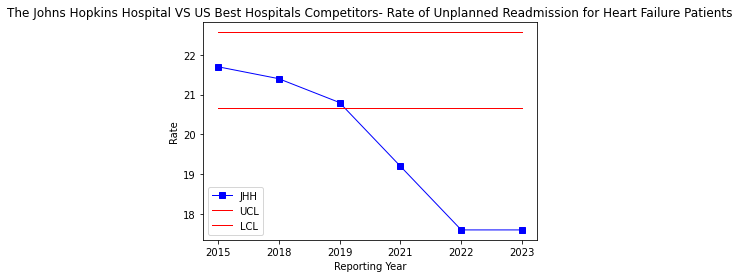

In [82]:
##Step 19: Plot Control Chart
plt.plot('Year','JHH', data = dfall, marker ='s' ,markerfacecolor = 'blue' , linewidth=1 ,color='blue')
plt.plot('Year','UCL' ,data = dfall, markersize = 0 , color = 'red' , linewidth=1)
plt.plot('Year','LCL',data = dfall, markersize = 0 , color = 'red' , linewidth=1)
plt.legend()
plt.title ('The Johns Hopkins Hospital VS US Best Hospitals Competitors- Rate of Unplanned Readmission for Heart Failure Patients')
plt.xlabel ('Reporting Year')
plt.ylabel ('Rate')